In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [15]:
df.drop(columns=['day','month','year'], inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [16]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [17]:
X = df.drop(columns=['Classes'])
y = df['Classes']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 11), (49, 11), (194,), (49,))

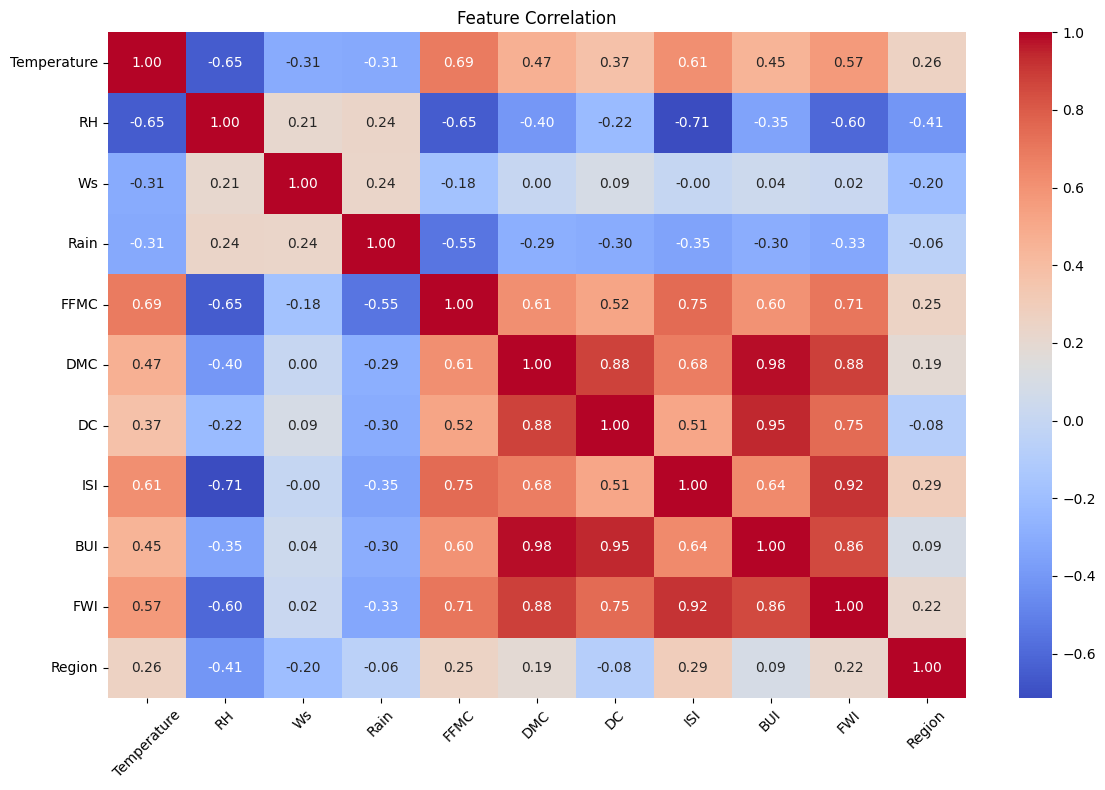

In [20]:
#Checking for multicollinearity
plt.figure(figsize=(12, 8))
plt.title('Feature Correlation')
sns.heatmap(X_train.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
def correlation(dataframe, threshold):
    col_corr = set()  
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute correlation
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(X_train, 0.85)

In [25]:
corr_features

{'BUI', 'DC', 'FWI'}

In [ ]:
#Removing Multicollinearity
X_train.drop(columns=corr_features, inplace=True)
X_test.drop(columns=corr_features, inplace=True)
X_train.shape, X_test.shape

((194, 8), (49, 8))

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5], X_test_scaled[:5]

(array([[-0.87563202,  0.21321832,  1.28577038, -0.09206896, -0.69568332,
         -0.74341993, -0.79648833, -1.01036297],
        [ 0.22209084, -1.65484925,  0.14504117, -0.38015572,  1.00119988,
          3.53088931,  1.88757476,  0.98974332],
        [ 1.5942444 , -1.25454906, -0.99568804, -0.14008342,  0.49000494,
         -0.168916  , -0.19488798,  0.98974332],
        [-0.32677059, -1.32126576,  2.04625653, -0.38015572,  0.88760101,
          0.22940672,  1.95699019,  0.98974332],
        [ 0.49652155,  0.14650162, -0.61544497, -0.38015572,  0.7669022 ,
          1.93759841,  0.93889729, -1.01036297]]),
 array([[-0.32677059,  0.14650162, -0.2352019 , -0.38015572,  0.61070375,
         -0.07699537,  0.17532762, -1.01036297],
        [ 0.22209084, -0.52066537, -0.99568804, -0.38015572,  0.71720269,
         -0.40637763,  0.33729694, -1.01036297],
        [-1.15006273, -0.25379858,  0.90552731,  0.6761624 , -1.02228009,
         -0.91960114, -0.86590375,  0.98974332],
        [ 0.49

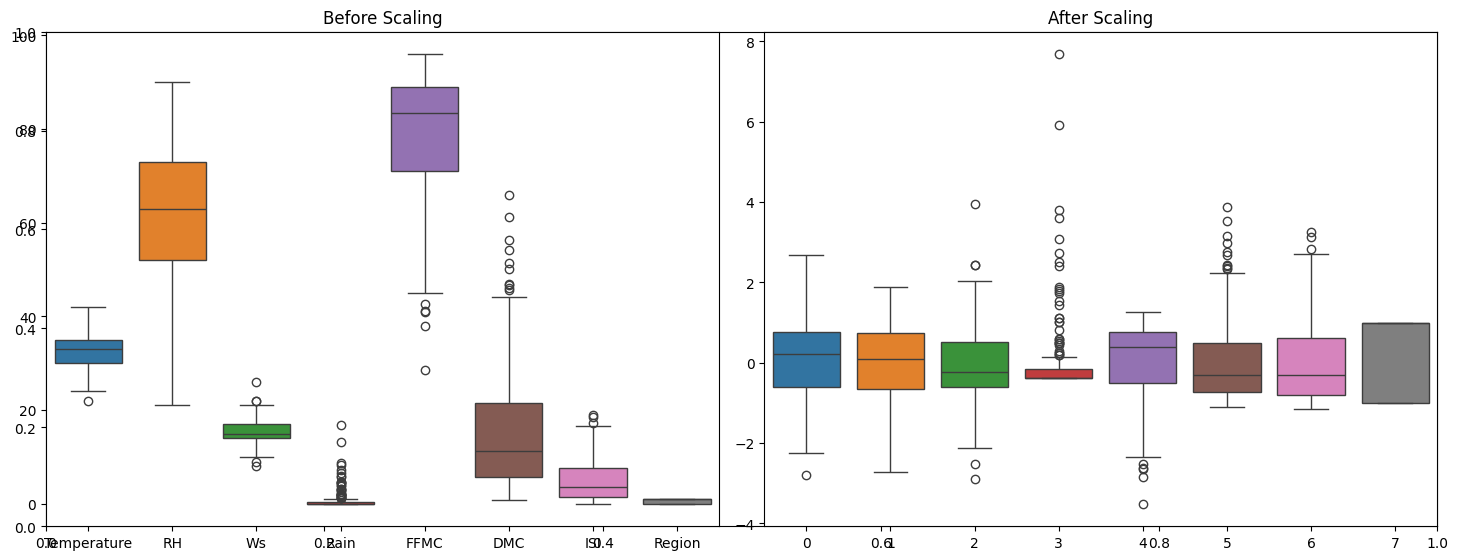

In [31]:
plt.subplots(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title('Before Scaling')
sns.boxplot(data=X_train)
plt.subplot(1, 2, 2)
plt.title('After Scaling')
sns.boxplot(data=X_train_scaled)
plt.tight_layout()
plt.show()

### Model Training:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.96      0.98        27

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49

[[22  0]
 [ 1 26]]
Accuracy: 0.98


In [36]:
#Pickling the rf model and preprocessor
import pickle
pickle.dump(rf, open('rf_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))